In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import random

In [2]:
# Создаем среду 2048
env = gym.make("gymnasium_2048:gymnasium_2048/TwentyFortyEight-v0")

# Выводим информацию о среде
print(f"Пространство действий: {env.action_space}")
print(f"Пространство наблюдений: {env.observation_space}")

Пространство действий: Discrete(4)
Пространство наблюдений: Box(0, 1, (4, 4, 16), uint8)


In [3]:
directions = {
    0: 'UP', 
    1: 'RIGHT', 
    2: 'DOWN', 
    3: 'LEFT', 
    'None': 'None'
}

In [4]:
def get_tile_value(observation):
    """Преобразование наблюдения в сетку 4x4 со значениями плиток."""
    grid = np.zeros((4, 4), dtype=np.int32)
    
    for i in range(1, 16):  # Пропускаем канал 0 (пустые ячейки)
        positions = np.where(observation[:, :, i] == 1)
        for x, y in zip(positions[0], positions[1]):
            grid[x, y] = 2 ** i
    
    return grid

def display_game(observation, step, reward, action, terminated=False, truncated=False, info=None):
    """Отображение текущего состояния игры."""
    clear_output(wait=True)
    
    grid = get_tile_value(observation)
    
    # Отображение сетки
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Определение цветов для различных значений плиток (как в оригинальной игре 2048)
    cmap = {
        0: '#CCC0B3',
        2: '#EEE4DA',
        4: '#EDE0C8',
        8: '#F2B179',
        16: '#F59563',
        32: '#F67C5F',
        64: '#F65E3B',
        128: '#EDCF72',
        256: '#EDCC61',
        512: '#EDC850',
        1024: '#EDC53F',
        2048: '#EDC22E',
    }
    
    # Установка цвета по умолчанию для значений, не указанных в cmap
    for value in np.unique(grid):
        if value > 2048:
            cmap[value] = '#3C3A32'
    
    # Создание таблицы для визуализации
    cell_text = [[str(int(grid[i, j])) if grid[i, j] > 0 else '' for j in range(4)] for i in range(4)]
    cell_colors = [[cmap.get(int(grid[i, j]), '#3C3A32') for j in range(4)] for i in range(4)]
    
    table = ax.table(
        cellText=cell_text,
        cellColours=cell_colors,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )
    
    # Настройка свойств таблицы
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    for key, cell in table.get_celld().items():
        cell.set_height(0.25)
        cell.set_width(0.25)
    
    ax.axis('off')
    
    direction = directions.get(action, 'None')
    
    # Добавление информации о шаге и вознаграждении
    plt.title(f'Шаг: {step}, Очки: {reward}, Действие: {direction}\n{"Игра окончена" if terminated or truncated else ""}')
    plt.tight_layout()
    plt.show()

In [5]:
def run_random_agent(n_steps=100, delay=0.5):
    """Запуск 2048 со случайным агентом."""
    env = gym.make("gymnasium_2048:gymnasium_2048/TwentyFortyEight-v0")
    observation, info = env.reset()
    
    total_reward = 0
    terminated = False
    truncated = False
    step = 0
    action = None
    
    while not (terminated or truncated) and step < n_steps:
        display_game(observation, step, total_reward, action, terminated, truncated, info)
        time.sleep(delay)
        
        action = env.action_space.sample()  # Случайное действие
        print(action)
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        step += 1
    
    # Отображение финального состояния
    display_game(observation, step, total_reward, action, terminated, truncated, info)
    
    # Вывод финальной статистики
    grid = get_tile_value(observation)
    max_tile = np.max(grid)
    
    print(f"Игра окончена через {step} шагов.")
    print(f"Общий счет: {total_reward}")
    print(f"Максимальная плитка: {max_tile}")
    
    env.close()
    
    return total_reward, max_tile, step

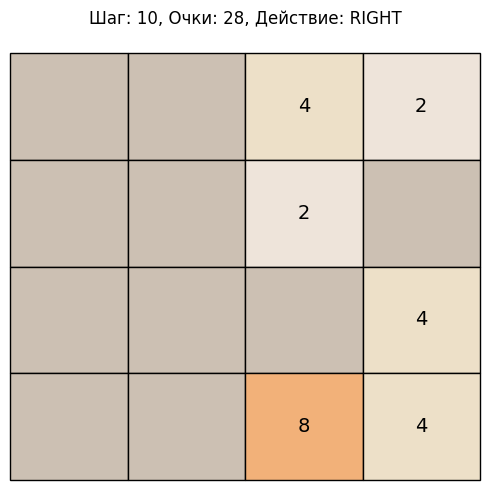

Игра окончена через 10 шагов.
Общий счет: 28
Максимальная плитка: 8


(np.uint8(28), np.int32(8), 10)

In [7]:
run_random_agent(n_steps=10, delay=5)

In [8]:
%matplotlib inline
from simulations import run_simulation, display_game

%load_ext autoreload
%autoreload 2

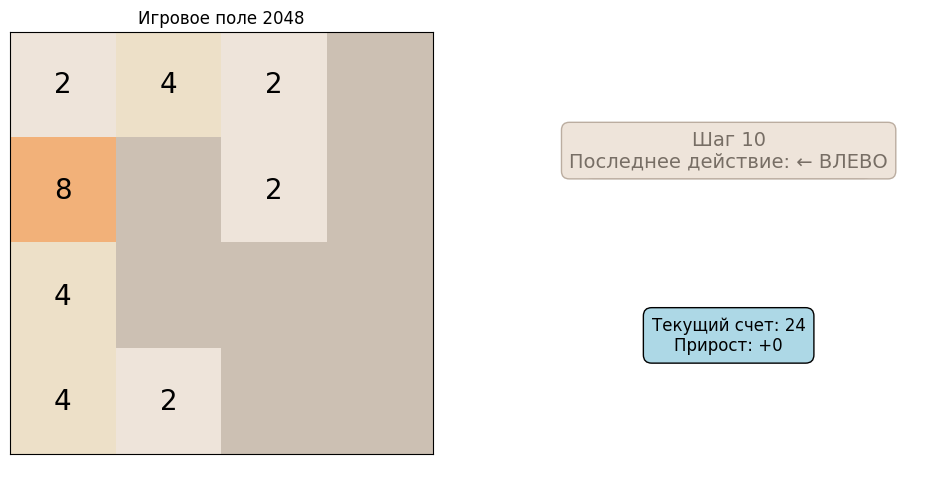

Достигнут лимит шагов
Итоговый счет: 24


np.uint8(24)

In [9]:
# Запуск симуляции со случайным агентом
run_simulation(
    agent_type='random',
    delay=2,
    max_steps=10
)